# Regression in Python
Audrey Rager
Springboard Linear Regression Project
August 30, 2020
***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [150]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [151]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [152]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [153]:
boston.data.shape

(506, 13)

In [154]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [155]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

NOTE:  I think MEDV has been changed to PRICE.

Now let's explore the data set itself. 

In [156]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [157]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [158]:
print(boston.target.shape)

(506,)


In [159]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [160]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Heat Map


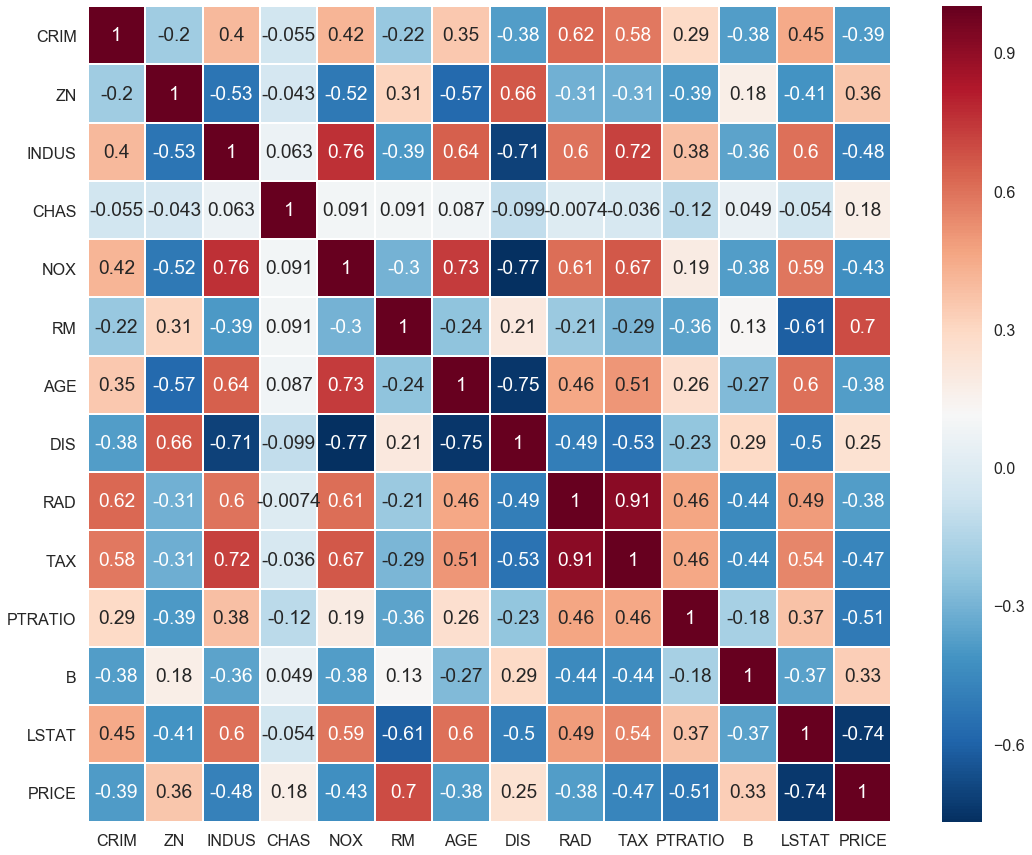

In [161]:
# Heat Map. A quick look at correlation between Different features
plt.figure(figsize=(18,15))
sns.heatmap(bos.corr(), annot=True, cmap="RdBu_r",lw=1)

### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5,1,'Relationship between CRIM and Price')

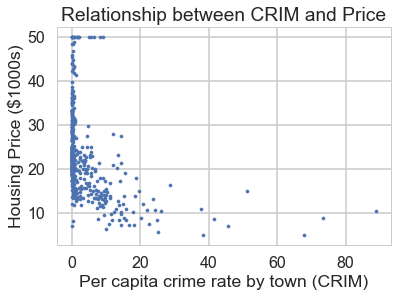

In [162]:
plt.scatter(bos.CRIM, bos.PRICE, s=10)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price ($1000s)")
plt.title("Relationship between CRIM and Price")

Text(0.5,1,'Relationship between CRIM (log) and Price')

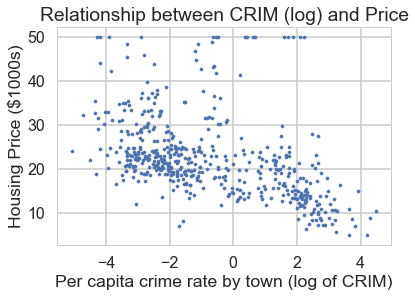

In [163]:
plt.scatter(np.log(bos.CRIM), bos.PRICE, s=10)
plt.xlabel("Per capita crime rate by town (log of CRIM)")
plt.ylabel("Housing Price ($1000s)")
plt.title("Relationship between CRIM (log) and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise a:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>

</div>


<b>Answer Part 2 Checkup Exercise Set I, a:</b> Overall, there seems to be a slight negative non-linear trend.  But there are few data points at CRIM values above about 30. So the appearance of a negative linear relationship may be due to these outliers.  Also most of the values are concentrated at low CRIM values. This could be an asymptote indicating a possible logarithimic relationship. There is a very large variation in Housing Price at zero CRIM. And also high crime rate (50) for some data points between 0 and 12 CRIM. It seems like, overall there is a negative correlation between CRIM and houseing price. In general, more expensive homes are in neighborhoods with lower crime rates, but all have some crime. It seems that the relationship is more complicated and we need to look at the data more closely to pinpoint what other variables may be involved in determing houseing price.


<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I (continued)</h3>

<p><b>Exercise b:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>


</div>

Text(0.5,1,'Relationship between Average Number of Rooms per Dwelling and Price')

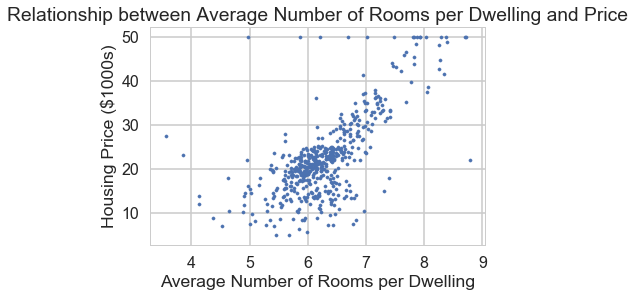

In [164]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE, s=10)
plt.xlabel("Average Number of Rooms per Dwelling")
plt.ylabel("Housing Price ($1000s)")
plt.title("Relationship between Average Number of Rooms per Dwelling and Price")


<p><b>Answer Part 2 Checkup Exercise Set I, b:</b> A general positive trend in the data.  More variation in the data at low values for Housing Price (0 - 30) and Average Number of Rooms per Dwelling (3 - 7). There is a tighter linear trend at higher values of Housing Price (>30) and Average Number of Rooms per Dwelling (>7). Also we still have all those points with a Housing Price of 50 spread out between 5 and 9 Average Number of Rooms. This makes me wonder if the data were just capped at $50K price or if this is just the most people were willing to pay for housing at the time? </p>


Text(0.5,1,'Relationship between Pupil-Teacher Ratio By Town and Price')

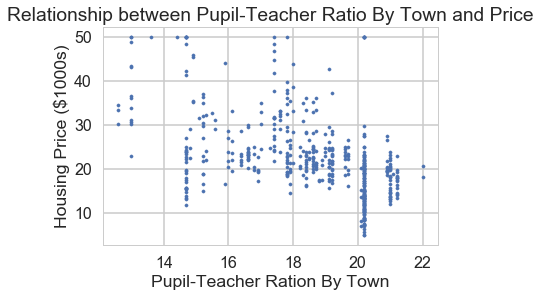

In [165]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE, s=10)
plt.xlabel("Pupil-Teacher Ration By Town")
plt.ylabel("Housing Price ($1000s)")
plt.title("Relationship between Pupil-Teacher Ratio By Town and Price")




<p><b>Answer Part 2 Checkup Exercise Set I, b (continued):</b> A general slight negative trend in the data.  Less variation in the Housing Price data at Pupil-Teacher Ratios above about 20. The negative trend makes me think there is a correlation between better funded schools and higher housing prices, where low Pupil-Teacher ratios is a proxy measurement for better school funding. This would make the neighborhood and thus the house more desireable, especially for young families. </p>



<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I (continued)</h3>


<p><b>Exercise c:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

Text(0.5,1,'Relationship between Proportion of\n Residential Land Zoned for\n Lots over 25,000 sq. ft. and Price')

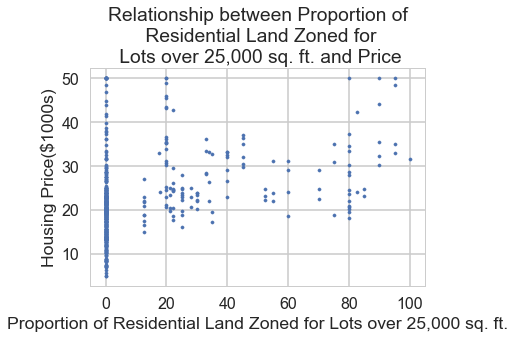

In [166]:
# your turn: scatter plot between *ZN* and *PRICE*
plt.scatter(bos.ZN, bos.PRICE, s=10)
plt.xlabel("Proportion of Residential Land Zoned for Lots over 25,000 sq. ft.")
plt.ylabel("Housing Price($1000s)")
plt.title("Relationship between Proportion of\n Residential Land Zoned for\n Lots over 25,000 sq. ft. and Price")


<p><b>Answer Part 2 Checkup Exercise Set I, c:</b> Slight positive relationship with fairly large variance.  Possible log normal relationship indicated by high number of values with low x values.</p>


Text(0.5,1,'Proportion of Non-retail Business Acres Per Town and Price')

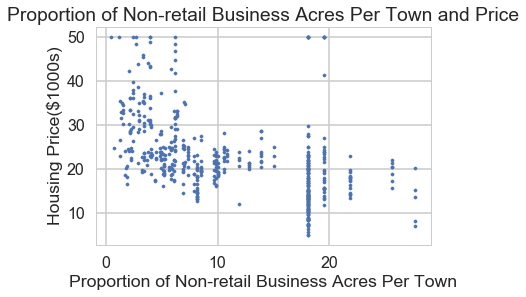

In [167]:
# your turn: scatter plot between *INDUS* and *PRICE*
plt.scatter(bos.INDUS, bos.PRICE, s=10)
plt.xlabel("Proportion of Non-retail Business Acres Per Town")
plt.ylabel("Housing Price($1000s)")
plt.title("Proportion of Non-retail Business Acres Per Town and Price")

<p><b>Answer Part 2 Checkup Exercise Set I, c (continued):</b> Negative relationship. Higher slope with lower x values. Not a very strong relationship; Large spread in data.</p>

Text(0.5,1,'Tracts that Bound the Charles River and Price')

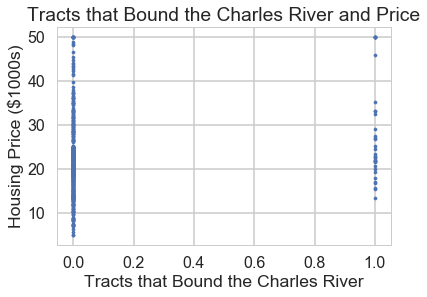

In [168]:
# your turn: scatter plot between *CHAS* and *PRICE*
plt.scatter(bos.CHAS, bos.PRICE, s=10)
plt.xlabel("Tracts that Bound the Charles River")
plt.ylabel("Housing Price ($1000s)")
plt.title("Tracts that Bound the Charles River and Price")

<p><b>Answer Part 2 Checkup Exercise Set I, c (continued):</b>  </p>
Values 0 and 1 for Tracts that bound the Charles River are binomial or binary (categorical data type with true or false values.  Linear regression should not be used for this type of data. This data type can be used with Logistic Regression.

Text(0.5,1,'Nitric Oxides Concentration (ppm) and Price')

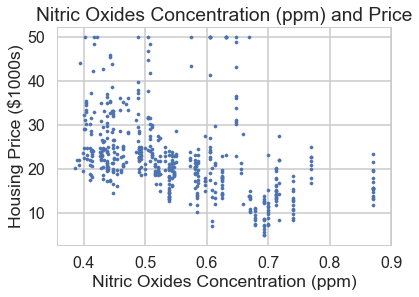

In [169]:
# your turn: scatter plot between *NOX* and *PRICE*
plt.scatter(bos.NOX, bos.PRICE, s=10)
plt.xlabel("Nitric Oxides Concentration (ppm)")
plt.ylabel("Housing Price ($1000s)")
plt.title("Nitric Oxides Concentration (ppm) and Price")

<p><b>Answer Part 2 Checkup Exercise Set I, c (continued):</b> Slight negative relationship with fairly large spread in data, indicating a weak relationship. </p>

Text(0.5,1,'Proportion of Owner-occupied Units Built Prior to 1940 and Price')

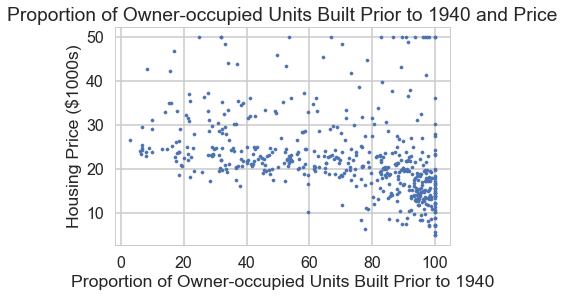

In [170]:
# your turn: scatter plot between *AGE* and *PRICE*
plt.scatter(bos.AGE, bos.PRICE, s=10)
plt.xlabel("Proportion of Owner-occupied Units Built Prior to 1940")
plt.ylabel("Housing Price ($1000s)")
plt.title("Proportion of Owner-occupied Units Built Prior to 1940 and Price")

<p><b>Answer Part 2 Checkup Exercise Set I, c (continued):</b> Very slight negative relationship for points clustered together; Lots of outliers for higher housing prices. </p>

Text(0.5,1,'Weighted Distance to Five Boston Employment Centers and Price')

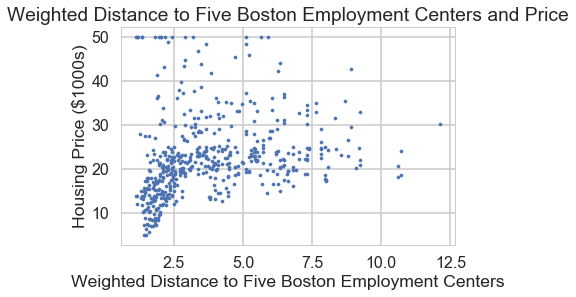

In [171]:
# your turn: scatter plot between *DIS* and *PRICE*
plt.scatter(bos.DIS, bos.PRICE, s=10)
plt.xlabel("Weighted Distance to Five Boston Employment Centers")
plt.ylabel("Housing Price ($1000s)")
plt.title("Weighted Distance to Five Boston Employment Centers and Price")

<p><b>Answer Part 2 Checkup Exercise Set I, c (continued):</b> Fairly tight high positive relationship for low values of x and y; Data fan out with high spread for x values above about 2.5 and y values above about 20. </p>

Text(0.5,1,'Index of Accessibility to Radial Highways and Price')

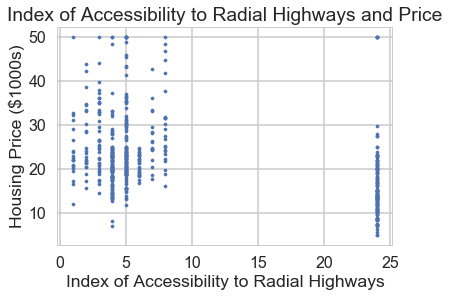

In [172]:
# your turn: scatter plot between *RAD* and *PRICE*
plt.scatter(bos.RAD, bos.PRICE, s=10)
plt.xlabel("Index of Accessibility to Radial Highways")
plt.ylabel("Housing Price ($1000s)")
plt.title("Index of Accessibility to Radial Highways and Price")

<p><b>Answer Part 2 Checkup Exercise Set I, c (continued):</b> It seems like x values of 8 and lower have a higher mean/median (eye-balling it at about 30) than the values of 24 (I'd say about 18). I think I might reclassify this as 0=Low (<10) Index of Accessibility ro Radial Highways (IARH) and 1=High (>20) IARH  and use it in a logistic regression.</p>

Text(0.5,1,'Full-value Property Tax Rate Per $10,000 and Price')

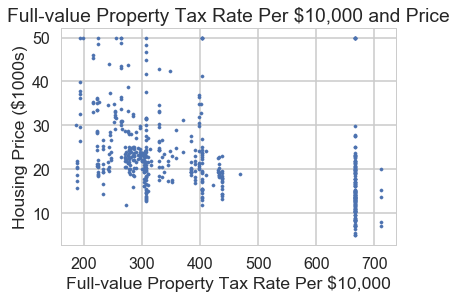

In [173]:
# your turn: scatter plot between *TAX* and *PRICE*
plt.scatter(bos.TAX, bos.PRICE, s=10)
plt.xlabel("Full-value Property Tax Rate Per $10,000")
plt.ylabel("Housing Price ($1000s)")
plt.title("Full-value Property Tax Rate Per $10,000 and Price")

<p><b>Answer Part 2 Checkup Exercise Set I, c (continued):</b> This plot is similar to the previous plot.  There does seem to by a slight negative trend with a large spread in the data for x values less than about 500.  But, again, I think I might recode these data values as low (0) and high (1) and use in logistic regression. </p>

Text(0.5,1,'Index of Proportion of Black Citizens per Town and Price')

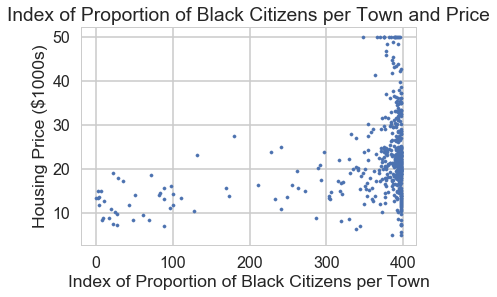

In [174]:
# your turn: scatter plot between *B* and *PRICE*
plt.scatter(bos.B, bos.PRICE, s=10)
plt.xlabel("Index of Proportion of Black Citizens per Town")
plt.ylabel("Housing Price ($1000s)")
plt.title("Index of Proportion of Black Citizens per Town and Price")

<p><b>Answer Part 2 Checkup Exercise Set I, c (continued):</b> This looks like high Index of Proportion of Black Citizens per Town (IPBC) can be found in towns with a wide range of prices.  I don't see a relationship between housing price and IPBC below about 350 either.</p>

Text(0.5,1,'Percent Lower Status of the Population and Price')

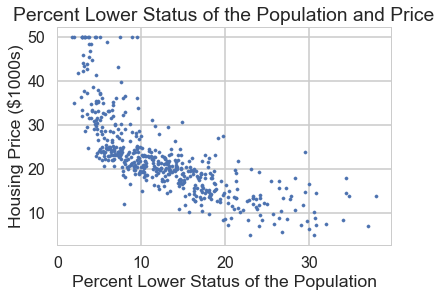

In [175]:
# your turn: scatter plot between *LSTAT* and *PRICE*
plt.scatter(bos.LSTAT, bos.PRICE, s=10)
plt.xlabel("Percent Lower Status of the Population")
plt.ylabel("Housing Price ($1000s)")
plt.title("Percent Lower Status of the Population and Price")

<b>Percent Lower Status Population (LSTAT) vs. Price</b>

This seems to be the strongest relationship so far.  There is a negative trend with higher percentages of "lower status" in the population corresponding with lower housing prices. There is a curvature to the relationship indicating it is probably not a first order relationship.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

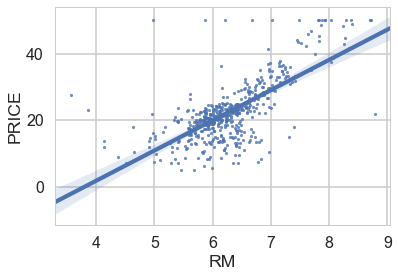

In [176]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True, scatter_kws={'s':10})

### Histograms
***


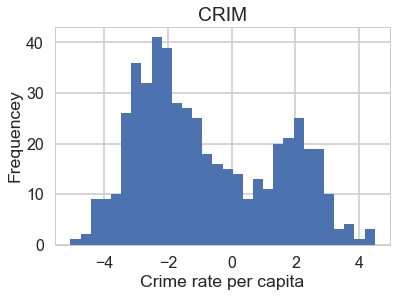

In [177]:
plt.hist(np.log(bos.CRIM),bins=30)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise a:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?


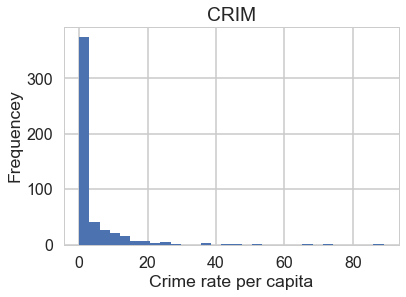

In [178]:
#your turn
plt.hist(bos.CRIM,bins=30)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<p><b>Answer Part 2 Checkup Exercise Set II, a:</b> The purpose of taking the log was to stretch the data out so we could see for of the variability and patterns in the data. Without the transformation, we don't notice that it has a bimodal distribution.</p>

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II (continued)</h3>

<p><b>Exercise b:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

<p><b>Answer Part 2 Checkup Exercise Set II, b</b> Based on the previous exercise, I've selected LSTAT and AGE. Here are individual histograms for each of these attributes.</p>

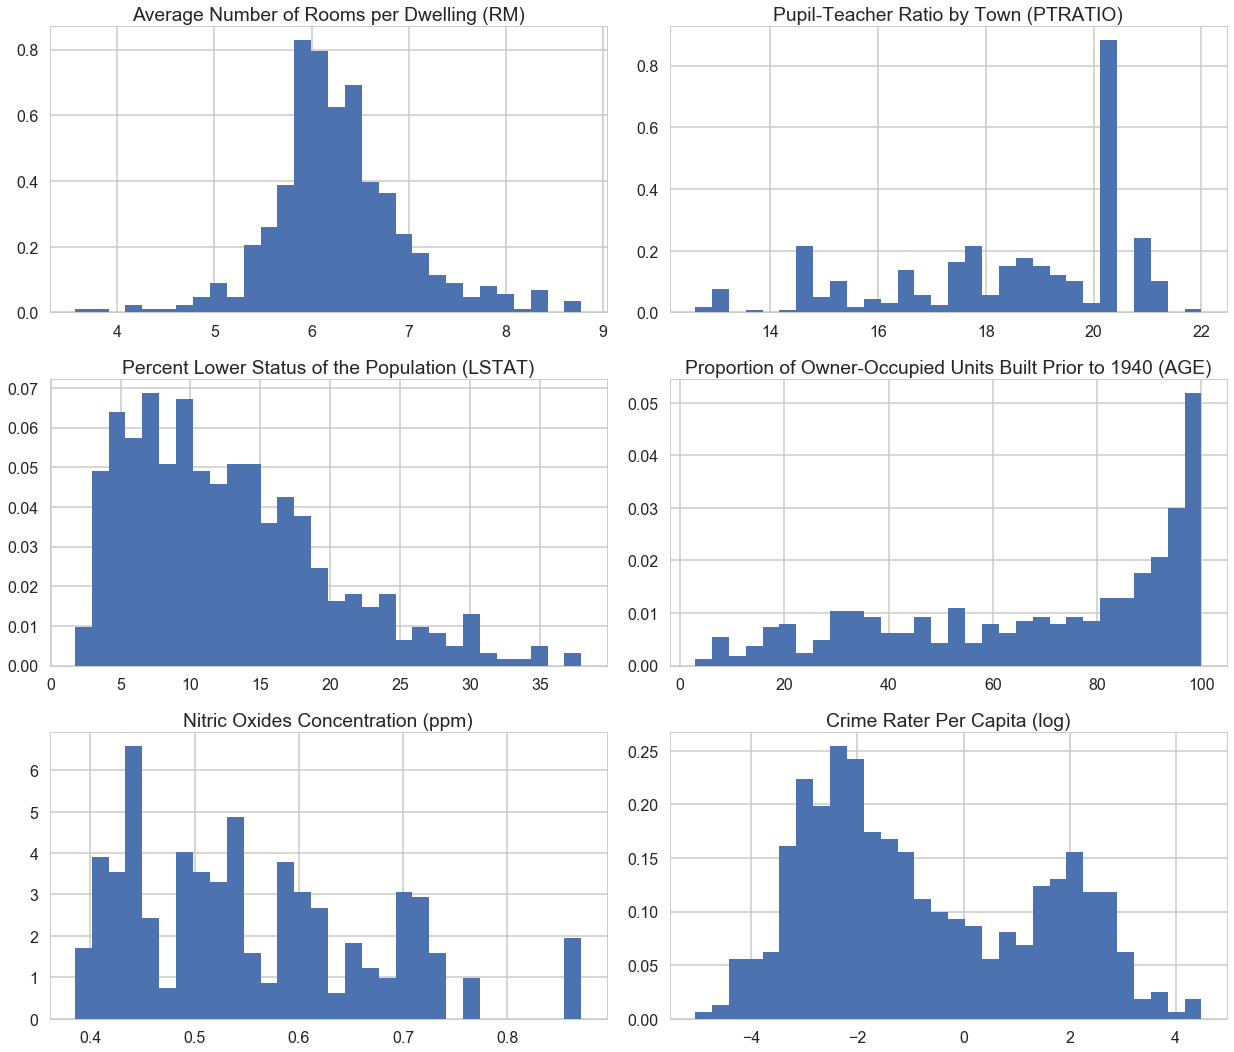

In [179]:
import numpy as np
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,15))
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

n_bins = 30

ax0.hist(bos.RM, n_bins, density=True, histtype='bar')
ax0.set_title('Average Number of Rooms per Dwelling (RM)')

ax1.hist(bos.PTRATIO, n_bins, density=True, histtype='bar')
ax1.set_title('Pupil-Teacher Ratio by Town (PTRATIO)')

ax2.hist(bos.LSTAT, n_bins, density=True, histtype='bar')
ax2.set_title('Percent Lower Status of the Population (LSTAT)')

ax3.hist(bos.AGE, n_bins, density=True, histtype='bar')
ax3.set_title('Proportion of Owner-Occupied Units Built Prior to 1940 (AGE)')

ax4.hist(bos.NOX, n_bins, density=True, histtype='bar')
ax4.set_title('Nitric Oxides Concentration (ppm)')

ax5.hist(np.log(bos.CRIM), n_bins, density=True, histtype='bar')
ax5.set_title('Crime Rater Per Capita (log)')

fig.tight_layout()
#plt.show()

<p><b>Answer Part 2 Checkup Exercise Set II, b (cont.):</b> Here is a series of each variable's histogram plotted agains the others.</p>

/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


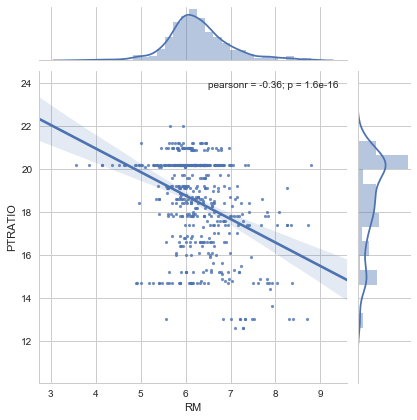

In [180]:
#Plot the histogram for RM and PTRATIO against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('RM', 'PTRATIO', data=bos, kind='reg',scatter_kws={'s':10})
plt.show()


/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


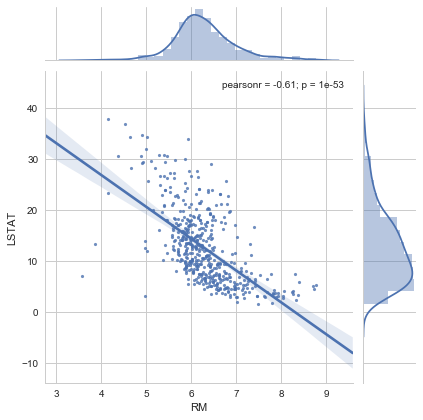

In [181]:
#Plot the histogram for RM and LSTAT against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('RM', 'LSTAT', data=bos, kind='reg',scatter_kws={'s':10})
plt.show()

/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


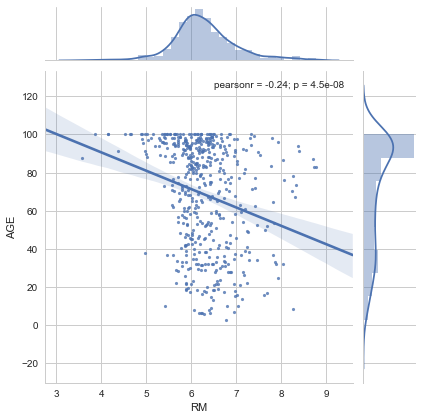

In [182]:
#Plot the histogram for RM and AGE against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('RM', 'AGE', data=bos, kind='reg',scatter_kws={'s':10})
plt.show()


/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


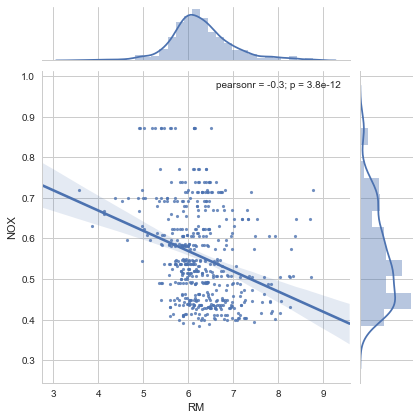

In [183]:
#Plot the histogram for RM and NOX against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('RM', 'NOX', data=bos, kind='reg',scatter_kws={'s':10})
plt.show()


/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


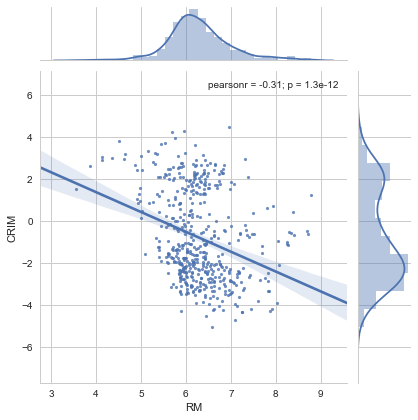

In [184]:
#Plot the histogram for RM and logCRIM against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('RM', np.log(bos.CRIM), data=bos, kind='reg',scatter_kws={'s':10})
plt.show()


/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


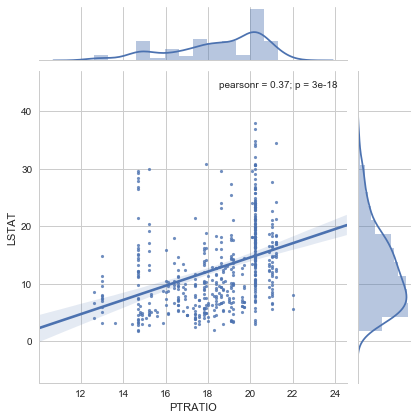

In [185]:
#Plot the histogram for PTRATIO and LSTAT against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('PTRATIO', 'LSTAT', data=bos, kind='reg',scatter_kws={'s':10})
plt.show()

/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


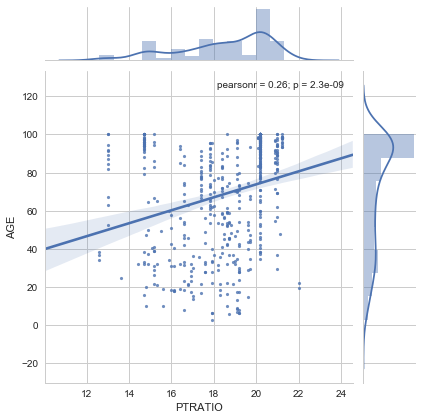

In [186]:
#Plot the histogram for PTRATIO and AGE against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('PTRATIO', 'AGE', data=bos, kind='reg',scatter_kws={'s':10})
plt.show()

/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


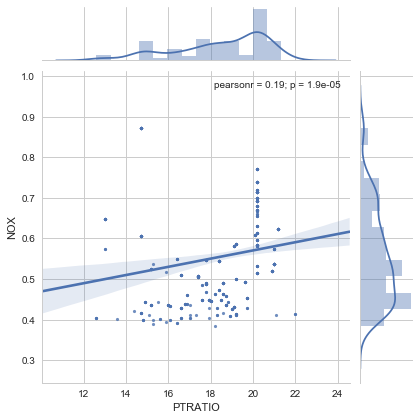

In [187]:
#Plot the histogram for PTRATIO and NOX against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('PTRATIO', 'NOX', data=bos, kind='reg',scatter_kws={'s':10})
plt.show()

/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


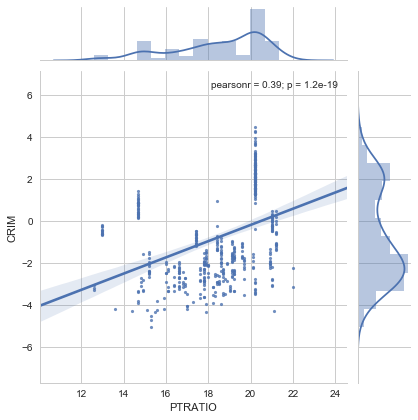

In [188]:
#Plot the histogram for PTRATIO and logCRIM against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('PTRATIO', np.log(bos.CRIM), data=bos, kind='reg',scatter_kws={'s':10})
plt.show()

/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


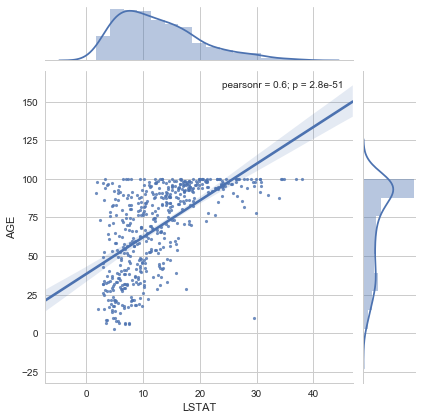

In [189]:
#Plot the histogram for LSTAT and AGE against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('LSTAT', 'AGE', data=bos, kind='reg',scatter_kws={'s':10})
plt.show()

/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


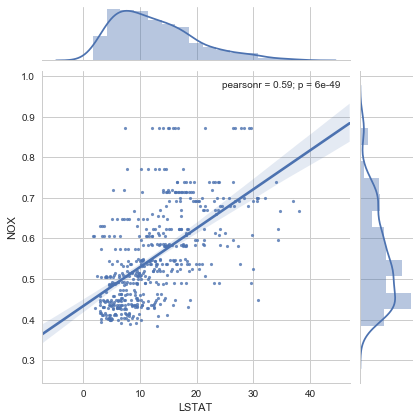

In [190]:
#Plot the histogram for LSTAT and NOX against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('LSTAT', 'NOX', data=bos, kind='reg',scatter_kws={'s':10})
plt.show()

/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


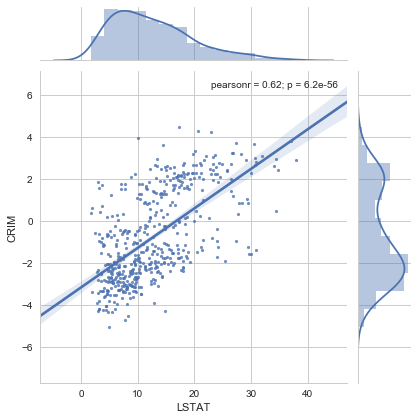

In [191]:
#Plot the histogram for LSTAT and logCRIM against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('LSTAT', np.log(bos.CRIM), data=bos, kind='reg',scatter_kws={'s':10})
plt.show()

/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


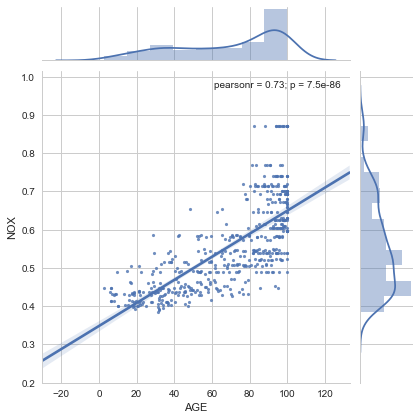

In [192]:
#Plot the histogram for AGE and NOX against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('AGE', 'NOX', data=bos, kind='reg',scatter_kws={'s':10})
plt.show()

/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


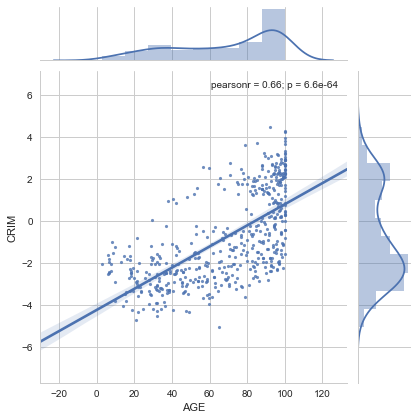

In [193]:
#Plot the histogram for AGE and logCRIM against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('AGE', np.log(bos.CRIM), data=bos, kind='reg',scatter_kws={'s':10})
plt.show()

/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


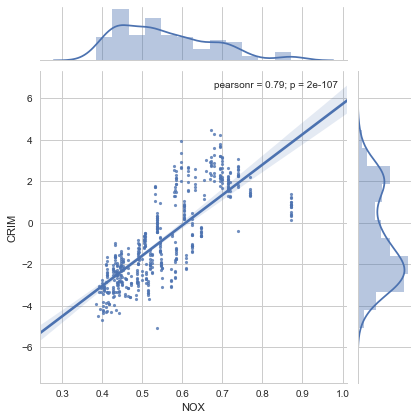

In [194]:
#Plot the histogram for NOX and logCRIM against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('NOX', np.log(bos.CRIM), data=bos, kind='reg',scatter_kws={'s':10})
plt.show()

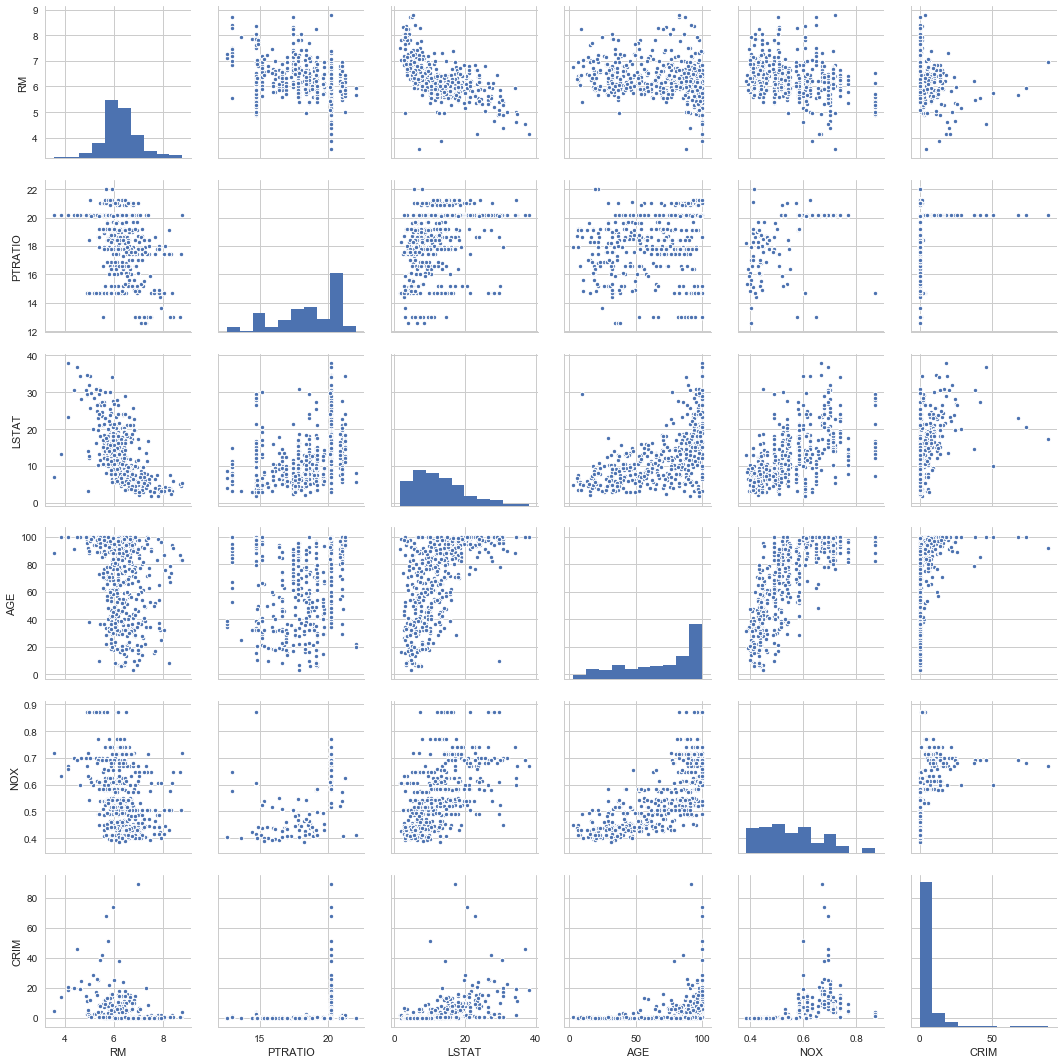

In [255]:

# # Plotting multiple variables against each other to look for correlations between predictors. 

# # 'LSTAT' is the variable I chose earlier. 
# # I also added 'AGE' and 'NOX' variables from a prior hypothesis 
# # that NOX levels would be higher in older houses and that lower income population
# # would be more likely to live in houses that are older

# # Note that the 'AGE' represents the 
# # "proportion of owner-occupied units built prior to 1940"

data = bos[['RM', 'PTRATIO', 'LSTAT', 'AGE', 'NOX', 'CRIM']]

sns.pairplot(data, plot_kws=dict(s=20, linewidth=1))

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [196]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [197]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 30 Aug 2020   Prob (F-statistic):           2.49e-74
Time:                        18:04:49   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

Text(0.5,1,'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$\n(Thousands of Dollars)')

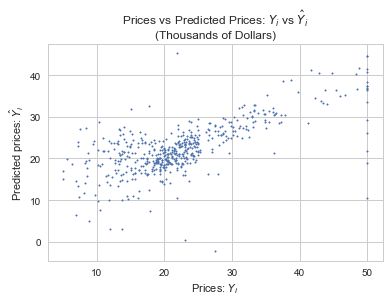

In [198]:
# your turn
# Plot

X = bos['PRICE']
y = m.fittedvalues

plt.scatter(X, y, marker='.',s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$\n(Thousands of Dollars)")

<p><b>Answer:</b> In general, there appears to be a positive trend betweent the original and predicted prices. There is more variation in lower  prices (less than 20K). But the strangest thing is the spread of spread in predicted price (y) at original prices of 50K. It seems similar to the upper limit of 50K in the RM (Number of Rooms per Dwelling) attribute. It makes me think that there is something about these housing prices that is still not be covered in the attributes we have for the model.</p>

### Fitting Linear Regression using `sklearn`


In [199]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [200]:
# Look inside lm object
#m.<tab>

#lm.coef_

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***
The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [201]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [202]:
print ('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 36.49110328036135


In [203]:
print ('Number of coefficients:', len(lm.coef_))


Number of coefficients: 13


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise a:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>




<p><b>Answer Part 3 Checkup Exercise Set II, a</b>: Changing the parameter 'fit_intercept' to False will discard the intercept term from the linear regression. I would not recommend eliminating the intercept term for this situation because I don't think any houses have a price of zero. 
</p>

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II (continued)</h3>

<p><b>Exercise b:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>



<p><b>Answer Part 3 Checkup Exercise Set II,  b</b>: Four assumptions of linear regression are: 
    <ol>
        <li>There is a linear relationship between the indepdent variable x and dependent variable y.</li>
        <li>The residuals are independent.</li>
        <li>The residuals have a constant variance at every level of x (Homoscedasticity).</li>
        <li>The residuals of the model are normally distributed.</li>
     </ol>
     
It is not enough for the residuals to be i.i.d. (independently and identically distributed). They must also have a constant variance (homoscedasticity).
     </p>

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II (continued)</h3>

<p><b>Exercise c:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


<p><b>Answer Part 3 Checkup Exercise Set II,  c</b>: False. The residuals must be normal, but the target variable doesn't need to be.</p>

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [204]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.49110328036135


In [205]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [206]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [207]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

Text(0,0.5,'Frequency')

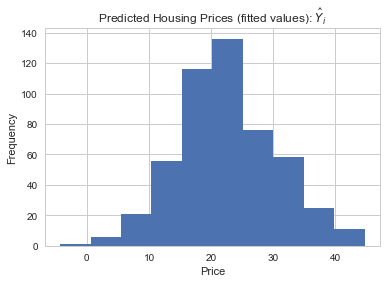

In [208]:
plt.hist(lm.predict(X))
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise a:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

</div>

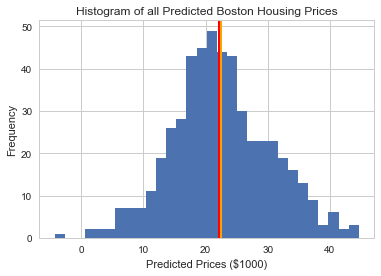

In [209]:
# your turn
plt.hist(lm.predict(X), bins=30)
plt.xlabel("Predicted Prices ($1000)")
plt.ylabel("Frequency")
plt.axvline(np.median(lm.predict(X)), ls='-', c='red', lw=2)
plt.axvline(np.mean(lm.predict(X)), ls='-', c='orange', lw=2)
plt.title("Histogram of all Predicted Boston Housing Prices")

plt.show()

In [210]:
# Median value of the Prices
print("Median value of the Boston housing prices is: {}".format(np.median(lm.predict(X))))

Median value of the Boston housing prices is: 22.12062451876077


In [211]:
#Turn the np array lm.predict(X) into a dataframe to extract some summer statistics
pd.DataFrame(lm.predict(X)).describe()


,0
count,506.000000
mean,22.532806
std,7.914896
min,-4.283009
25%,17.447270
50%,22.120625
75%,27.412587
max,44.673399


In [212]:
#Another way to get some summary statistics using scipy stats
stats.describe(lm.predict(X))

DescribeResult(nobs=506, minmax=(-4.283009341921691, 44.673399227722285), mean=22.53280632411068, variance=62.645582437365846, skewness=0.1107734825597236, kurtosis=0.10314181078841278)

<p><b>Answer Part 3 Checkup Exercise Set III,  a</b>: 
<br>    
The data appear to be normally distributed, perhaps with a slight right skew.
    <UL>
        <li>Mean = 22.53 
        <li>Median = 22.13 
        <li>Range = 48.95
            <ul>
                <li>Min: -4.28
                <li>Max: 44.67
            </ul>
        <li>Standard Deviation = 7.91
        <li>Variance = 62.65
        <li>IQR = 9.97 
        <li>Skewness = 0.11
        <li>Kurtosis = 0.10
   </UL>
Looking at the histogram, it doesn't look like there are an usual amount of outliers. The kurtosis value of 0.1 indicates that there are not an excessive number of outliers. I don't think anything needs to be done about them.
        </p>


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III - Continued</h3>

<p><b>Exercise b:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

</div>

Text(0,0.5,'Original Price')

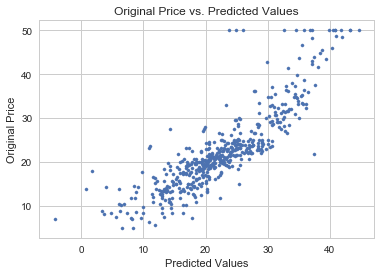

In [213]:
plt.scatter(lm.predict(X),bos.PRICE, s=10)
plt.title('Original Price vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Original Price')

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III - Continued</h3>

<p><b>Exercise c:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

<p><b>Answer Part 3 Checkup Exercise Set III,   c</b>: An advantage of statsmodels is that it prints out a lot of informationon the actual fit/model (e.g., coefficients, errors, p-values, intervals and performance statistics [AIC, F-score, etc.]). An advantage of scikit-learn is the LinearRegression object and its many methods that can be used to predict new values and check the accuracy.  
</p>

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [214]:
# Residual Sum of Squares (RSS)
rss = np.sum((bos.PRICE - lm.predict(X)) ** 2)
print("Residual sum of squares: {}".format(round(rss,3)))


Residual sum of squares: 11080.276


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [215]:
# Explained Sum of Squares (ESS)
ess =  np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2)
print("Explained sum of squares: {}".format(round(ess,3)))

Explained sum of squares: 31636.019


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise a:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

</div>

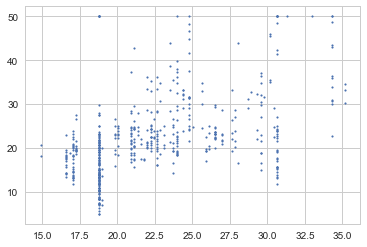

In [216]:
# your turn
m_ptratio = ols('PRICE ~ PTRATIO', bos).fit()
plt.scatter(m_ptratio.fittedvalues, bos.PRICE, s=3)

In [217]:
m_ptratio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 30 Aug 2020   Prob (F-statistic):           1.61e-34
Time:                        18:05:14   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.000      56.393      68.296
PTRATIO       -2.1572      0.163    -13.233      0.000      -2.477      -1.837
==============================================================================
Omnibus:                       92.924   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.444
Skew:                           1.001   Prob(JB):                     2.68e-42
Kurtosis:                       5.252   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p><b>Answer Part 3 Checkup Exercise Set IV, a</b>: 
<ul>
    <li>Coefficient of the Intercept: 62.3446
    <li>Coefficient of PTRATIO: -2.1572
</ul>
On average, each increase of one unit in PTRATIO results in a decrease of $2,157 in housing prices, given that all other variables are constant.
</p>

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV - Continued</h3>


<p><b>Exercise b:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

</div>

<p><b>Answer Part 3 Checkup Exercise Set IV, b</b>: The R<sup>2</sup> value is 0.258 (Adjusted R<sup>2</sup> is 0.256). This is a relatively low value indicating this model does not expalin the variance of the data very well.</p>

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV - Continued</h3>



<p><b>Exercise c:</b> Compute the $F$-statistic. What does it tell you?</p>


</div>

<p><b>Answer Part 3 Checkup Exercise Set IV, c</b>: The F-statistic is 175.1. This means that the explained sum of squared differences is about 175 times greater than the mean squared error. The associated p-value is 1.61e-34, which is close to 0. This is a statistically significant result and we can safely reject the null hypothesis.</p>

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV - Continued</h3>

<p><b>Exercise d:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

<p><b>Answer Part 3 Checkup Exercise Set IV, d</b>: The partial 𝐹-statistic on a single variable is equal to the square of the 𝑡-statistic on its regression coefficient." Thus ${t^2}$ = F
The square of the t-statistic (-13.233) is 175.1, which is exactly the F-statistic. This is because this is a simple linear regression with only one variable in the model. 

</p>

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>


</div>

In [218]:
# your turn
m_three = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
m_three.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Sun, 30 Aug 2020   Prob (F-statistic):           1.09e-97
Time:                        18:05:20   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.413     -11.240       4.627
CRIM          -0.2021      0.032     -6.301      0.000      -0.265      -0.139
RM             7.3816      0.402     18.360      0.000       6.592       8.171
PTRATIO       -1.0742      0.133     -8.081      0.000      -1.335      -0.813
==============================================================================
Omnibus:                      233.249   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2002.374
Skew:                           1.802   Prob(JB):                         0.00
Kurtosis:                      12.054   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V - Continued</h3>

<p><b>Exercise a:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

</div>

<p><b>Answer Part 3 Checkup Exercise Set V, a</b>: The F-statistic is 244.2.  This is much higher than the previous model. The F-statistic is measuring the joint affect of all the variables in the model together. This model also has a very small p-value (1.09e-97) indicating the model is statistically significant.
</p>

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V - Continued</h3>

<p><b>Exercise b:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

</div>

<p><b>Answer Part 3 Checkup Exercise Set V, b</b>: The R<sup>2</sup> statistic  is 0.594 (Adjusted R<sup>2</sup> value: 0.592) indicating that the three variables explain about 60% of the total variance. This is an improved performance compared to fitting just RM variable (R<sup>2</sup>: 0.484) and PTRATIO variable (R<sup>2</sup>: 0.258) alone respectively.</p>

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V - Continued</h3>

<p><b>Exercise c:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

<p><b>Answer Part 3 Checkup Exercise Set V, c</b>: All three variables have a p-value of zero, suggesting that all three variables are significant in predicting house price. However we can assign relative significance to each variable from their t-values. RM variable has a t-value of 18.382, (greater than the absolute value of other two variable t-scores) which implies that RM variable is the most significant variable in predicting housing price. This can also be seen if we fit all three variables indpendently to a linear regression model. Model with the RM variable has the highest R<sup>2</sup> value.</p>

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

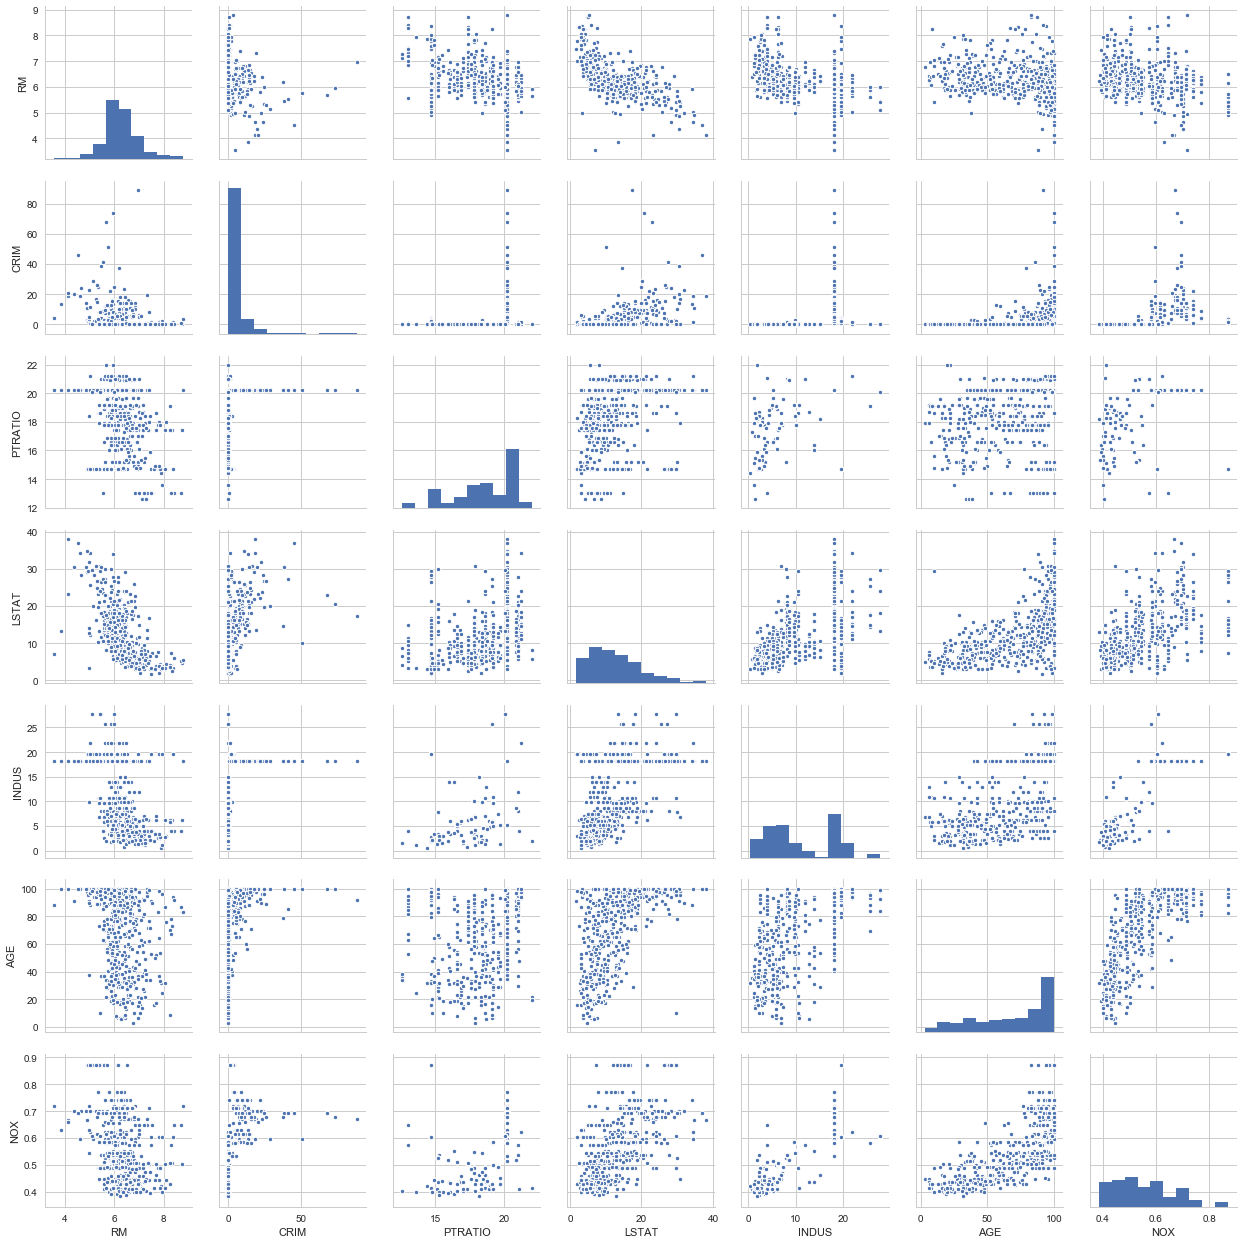

In [219]:
#Note: original model contained CRIM + RM + PTRATIO
#Pairplots to eyeball the relationship of 'RM' with other variables
data = bos[['RM', 'CRIM','PTRATIO', 'LSTAT', 'INDUS', 'AGE', 'NOX']]


sns.pairplot(data, plot_kws=dict(s=20, linewidth=1))

<p><b>Checkup Exercises 4 Answer</b>: One of the assumptions of linear regression is that there should be little or no multicollinearity between the features. This is because if features are colinear (correlated) with each other, it diminishes the model's ability to explain variance.

In the previous model where 'CRIM', 'RM', and 'PTRATIO' were the input variables, the 'RM' indepenent variable had the highest predicting power. To improve model performance with just one extra addition of variable, it would be wise to choose a variable that is not highly correlated with the 'RM' variable.

Looking at the pairplot above with 'RM' and six other variables I selected, it looks like 'PTRATIO', 'AGE', and 'NOX' have the least correlation with 'RM' variable. 'PTRATIO' is already in the model I'm going to add 'AGE' and 'NOX' to the next iteration of the model.</p>

In [220]:
m_new = ols('PRICE ~ CRIM + RM + PTRATIO + AGE + NOX', bos).fit()
m_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     160.3
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          1.92e-101
Time:                        18:05:29   Log-Likelihood:                -1598.2
No. Observations:                 506   AIC:                             3208.
Df Residuals:                     500   BIC:                             3234.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9649      4.449      1.341      0.181      -2.777      14.707
CRIM          -0.1353      0.034     -4.025      0.000      -0.201      -0.069
RM             6.9133      0.402     17.196      0.000       6.123       7.703
PTRATIO       -1.0493      0.131     -7.982      0.000      -1.308      -0.791
AGE           -0.0127      0.014     -0.937      0.349      -0.039       0.014
NOX          -11.1027      3.400     -3.265      0.001     -17.783      -4.423
==============================================================================
Omnibus:                      289.292   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3125.608
Skew:                           2.290   Prob(JB):                         0.00
Kurtosis:                      14.281   Cond. No.                     1.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<p><b>Checkup Exercises 4 Answer (contineud)</b>: The new model has an F-statistic of 160.3, and $R^2$ value of 0.616, and AIC of 3207. The $R^2$ value is higher than the previous model (3 predictor variables - $R^2$: 0.594). The F-statistic is lower than the previous model (244.2). The AIC value is also lower than the previous model (AIC: 3232.) This indicates that the new model with 'NOX' and 'AGE' variables added in is a better model than the previous one.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise a:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>
</div>

In [221]:
# Your turn.
# Using the Reduced Model (only three variables)
m_reduced = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
m_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Sun, 30 Aug 2020   Prob (F-statistic):           1.09e-97
Time:                        18:05:29   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.413     -11.240       4.627
CRIM          -0.2021      0.032     -6.301      0.000      -0.265      -0.139
RM             7.3816      0.402     18.360      0.000       6.592       8.171
PTRATIO       -1.0742      0.133     -8.081      0.000      -1.335      -0.813
==============================================================================
Omnibus:                      233.249   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2002.374
Skew:                           1.802   Prob(JB):                         0.00
Kurtosis:                      12.054   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'Fitted Values vs. Residual')

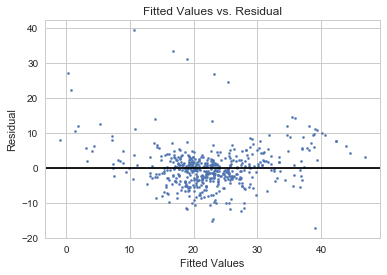

In [222]:
#Scatter plot of the fittedvalues() vs. residual
plt.axhline(0, ls="-", color='black')
plt.scatter(m_reduced.fittedvalues, m_reduced.resid, s=5)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residual")

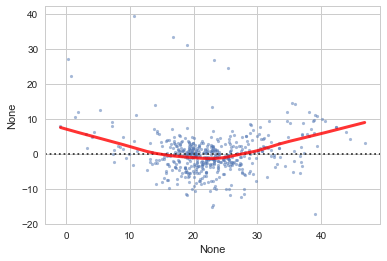

In [223]:
# # Using sns.residplot to show the trend line as well! 
sns.residplot(m_reduced.fittedvalues, m_reduced.resid, lowess=True, 
              scatter_kws={"s": 10, 'alpha':0.5},
              line_kws={'color': 'red', 'lw':3, 'alpha':0.8})

<p><b>Answer Part 5 Checkup Exercises, a</b>: Interpretation: Fitted Values vs. Residual Plot is used to detect non-linearity, unequal error variances, and outliers. 

The above plot the residuals may not be normally distributed.</p>

<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises - Continued </h3>

<p><b>Exercise b:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

</div>

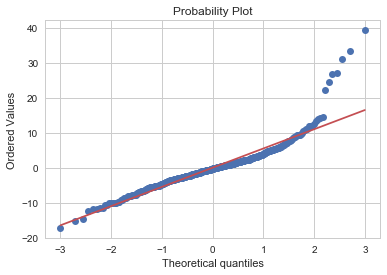

In [234]:
# API Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
# SO Reference: https://stackoverflow.com/questions/13865596/quantile-quantile-plot-using-scipy

stats.probplot(m_reduced.resid, dist='norm', plot=plt)
plt.show()
# sm.qqplot(m_reduced.resid, line='45')

<p><b>Answer Part 5 Checkup Exercises, b</b>: This plot shows that the residuals do not have a normal distributionm. There are significant outliers in the upper right of the quartile plot. This indicates that these outliers need to be addressed.</p>

<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises - Continued</h3>

<p><b>Exercise c:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>


</div>

<p><b>Answer Part 5 Checkup Exercises, c</b>:  <br>

Fitted vs. Residual:
<ul>
<li>used to detect non-linearity, homo/heteroscedasticity, and outliers
<li>easier to identify outliers because of more widely distributed plot scheme
<li>shows how the model performs on each individual obsertation
</ul>
<br>
QQ Plot:
<ul>
    <li>used to detect normality of residuals
    <li>when guiding line is plotted, it creates a clear picutre of error normality
    <li>summarizes the entire model's performande and shows how close the residuals are to the normal distribution.
    
</ul>
 
    </p>

<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises - Continued</h3>


<p><b>Exercise d:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

</div>

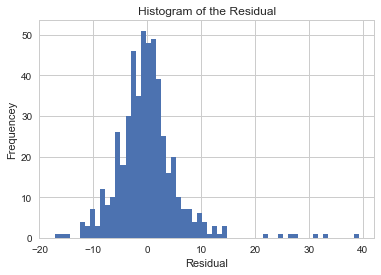

In [225]:
plt.hist(m_reduced.resid, bins = 60)
plt.xlabel("Residual")
plt.ylabel("Frequencey")
plt.title("Histogram of the Residual")
plt.show()

In [228]:
#Take a look at the outlier values in the high quartiles
bos[m_reduced.resid>20]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
369,5.66998,0.0,18.1,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.1,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0


<p>There are seven outliers.</p>

In [237]:
# identify outliers
m_reduced.resid.sort_values(ascending=False).head(10)

368    39.308782
372    33.309378
371    30.987309
365    27.140217
369    26.820138
370    24.537665
367    22.323166
186    14.633415
161    14.112369
407    13.924798
dtype: float64

In [229]:
#Look at the stats for the entire data set again
bos[['CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','PTRATIO','PRICE']].describe()

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,68.574901,3.795043,9.549407,408.237154,18.455534,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,28.148861,2.105710,8.707259,168.537116,2.164946,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,2.900000,1.129600,1.000000,187.000000,12.600000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,45.025000,2.100175,4.000000,279.000000,17.400000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,77.500000,3.207450,5.000000,330.000000,19.050000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,94.075000,5.188425,24.000000,666.000000,20.200000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,100.000000,12.126500,24.000000,711.000000,22.000000,50.000000


In [232]:
#Look at the stats for these seven outliers
bos[m_reduced.resid>20][['CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','PTRATIO','PRICE']].describe()

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,PRICE
count,7.000000,7.0,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.0,7.0,7.0,7.000000
mean,7.526369,0.0,1.810000e+01,0.428571,0.648714,95.971429,1.330586,24.0,666.0,20.2,42.942857
std,3.150706,0.0,3.837369e-15,0.534522,0.033520,5.122732,0.180677,0.0,0.0,0.0,12.119111
min,4.555870,0.0,1.810000e+01,0.000000,0.631000,87.900000,1.129600,24.0,666.0,20.2,23.100000
25%,5.284100,0.0,1.810000e+01,0.000000,0.631000,93.200000,1.185750,24.0,666.0,20.2,38.750000
50%,6.538760,0.0,1.810000e+01,0.000000,0.631000,97.500000,1.332500,24.0,666.0,20.2,50.000000
75%,8.749775,0.0,1.810000e+01,1.000000,0.649500,100.000000,1.433650,24.0,666.0,20.2,50.000000
max,13.522200,0.0,1.810000e+01,1.000000,0.718000,100.000000,1.613200,24.0,666.0,20.2,50.000000


<p><b>Answer Part 5 Checkup Exercises, d</b>:<br><br>
There appear to be seven outliers in the model: 365, 367, 368, 369, 370, 371, and 372. They have the highest residual values (22.3 to 33.9). They all have somewhat similar values to each other for each varible; but they differ quite a bit from the mean of each variable for the whole data set. In fact, they have identical values for some variables. 
    <br><br>
    The fact that these data points are sequentially numbered 365 - 372 makes me wonder if it has something to do with a data entry or data wrangling error. 


</p>

<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises - Continued</h3>


<p><b>Exercise e:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>


</div>

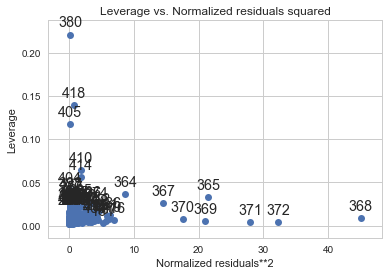

In [242]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
leverage = plot_leverage_resid2(m_reduced)

In [243]:
bos.iloc[[380, 418, 405, 410, 414]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0


In [244]:
bos.CRIM.sort_values(ascending=False).head()

380    88.9762
418    73.5341
405    67.9208
410    51.1358
414    45.7461
Name: CRIM, dtype: float64

<p><b>Answer Part 5 Checkup Exercises, e</b>: It looks like there are 3 to 5 high leverage points (380, 418, 405, 410, and 414). These points all have extremely high crime rates compared with the mean of 3.6. The values for ZN, INDUS, CHAS, RAD, TAX, and PTRATIO are all the same.  The other values are also quite similar.  This could be because they are geographically close to one another, or could indicate corruption of the data due to data entry or data wrangling error.</p>

<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises - Continued</h3>

<p><b>Exercise f:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [245]:
#Make new dataset (dataframe) by dropping the 
#outliers (365, 367, 368, 369, 370, 371, and 372) and 
#high leverage points (380, 405, 410, 414, 418).

bos_clean = bos.drop([365, 367, 368, 369, 370, 371, 372, 380, 405, 410, 414, 418], axis=0)

In [246]:
#desribe the new "clean" data frame
bos_clean.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,2.911833,11.639676,10.967632,0.064777,0.552230,6.301532,67.885020,3.852757,9.198381,401.975709,18.413158,358.795182,12.643198,22.378138
std,5.797018,23.536294,6.855739,0.246382,0.116057,0.681476,28.126065,2.097685,8.512079,165.649106,2.173753,88.236979,7.070535,8.775547
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.079870,0.000000,5.130000,0.000000,0.448000,5.889500,43.475000,2.122975,4.000000,277.500000,17.000000,376.247500,6.950000,17.100000
50%,0.240075,0.000000,8.560000,0.000000,0.532000,6.210000,76.500000,3.298600,5.000000,330.000000,18.900000,391.770000,11.395000,21.200000
75%,2.709347,16.250000,18.100000,0.000000,0.624000,6.623500,93.600000,5.226975,8.000000,666.000000,20.200000,396.270000,16.930000,25.000000
max,41.529200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [247]:
#Just a reminder of what the "uncleaned" data looks like
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [254]:
#Re-run the second model with the new cleaned data

model_new_clean = ols('PRICE ~ CRIM + RM + PTRATIO', bos_clean).fit()
model_new_clean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     423.2
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          1.39e-135
Time:                        19:42:21   Log-Likelihood:                -1457.6
No. Observations:                 494   AIC:                             2923.
Df Residuals:                     490   BIC:                             2940.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.7069      3.268     -2.052      0.041     -13.128      -0.286
CRIM          -0.3177      0.039     -8.152      0.000      -0.394      -0.241
RM             7.9303      0.333     23.789      0.000       7.275       8.585
PTRATIO       -1.0842      0.107    -10.149      0.000      -1.294      -0.874
==============================================================================
Omnibus:                       21.369   Durbin-Watson:                   1.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.140
Skew:                           0.232   Prob(JB):                     4.29e-10
Kurtosis:                       4.371   Cond. No.                         312.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p><b>Answer Part 5 Checkup Exercises, f</b>:

The model with outliers and high leverage points removed performed better than the same model run on the original data.
The previous model with reduced variables (CRIM + RM + PTRATIO) on uncleaned data had an R<sup>2</sup> value of 0.593 (adjusted R<sup>2</sup> of 0.591), F-statistic of 244.2, and p-vale of 1.09e-97.  A linear regression with the same three variables run on the cleaned data set yielded an R<sup>2</sup> value of 0.722 (adjusted R<sup>2</sup> of 0.720), F-statistic of423.2, and p-vale of 1.39e-135. 
The p-values for both models were good.  The most improvment was in the R<sup>2</sup> values and the F-statistics.


</p>